# Student Details
* Guy Kabiri

# TL;DR
In this lab, we have practiced some basic filters in image procession such as `LPF`, `HPF` using the `scipy` convolution function.  
We had to implement our code for convolution and compare the differences between our convolution function to `scipy`'s using a self implementation of `MSE` as well.  
Also, we had to read about `Canny Edge Detection` theory and practiced it using `Open-CV`'s implementation on the images with its default parameters. 

# Imports and Drive Config

In [ ]:
import numpy as np 
import cv2
from matplotlib import pyplot as plt
from scipy.signal import convolve, convolve2d, correlate2d

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
GOOGLE_DRIVE_PATH_AFTER_MY_DRIVE = 'Colab Notebooks/Computer Vision/Lab 1'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MY_DRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))    #   print files in this directory

['EXERCISE.md', 'LAB_1_ComputerVision_template.html', 'myConv2d.py', 'Computer Vision Lab 1.ipynb']


In [ ]:
import sys 
sys.path.append(GOOGLE_DRIVE_PATH)

In [ ]:
!wget http://www.turtleluck.com/wp-content/uploads/2014/06/Lionel-Messi.jpg -O messi.jpg
#img = cv2.imread(GOOGLE_DRIVE_PATH + '/' + 'messi.jpg')

--2021-03-03 07:47:16--  http://www.turtleluck.com/wp-content/uploads/2014/06/Lionel-Messi.jpg
Resolving www.turtleluck.com (www.turtleluck.com)... 209.124.66.9
Connecting to www.turtleluck.com (www.turtleluck.com)|209.124.66.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37353 (36K) [image/jpeg]
Saving to: ‘messi.jpg’

messi.jpg           100%[===================>]  36.48K  --.-KB/s    in 0.01s   

2021-03-03 07:47:17 (3.68 MB/s) - ‘messi.jpg’ saved [37353/37353]



In [ ]:
messi_img = cv2.imread('messi.jpg')                   #   BGR
messi_img = cv2.cvtColor(messi_img, cv2.COLOR_BGR2GRAY)     #   convert to gray scale

In [ ]:
def print_image(img, title='', cmap='gray', figsize=(12, 8)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.show()

# LPF
Which mainly used to smooth images.
We will use `k=3` filter.

In [ ]:
size = 7
small_blur = np.ones((size, size), dtype='float') * (1.0 / (size ** 2))
         #   create matrix of ones divide by the power of the size of matrix
blurred_img = convolve2d(messi_img, small_blur)

print_image(blurred_img, title='Blurred Messi')

# HPF
typically used to find edges in the input image.
the sum of the filters coefficient has to be zero.

## Laplacian Matrix

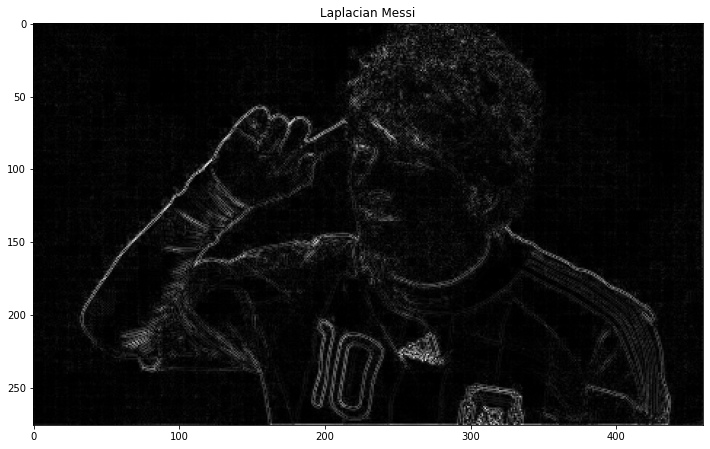

In [ ]:
mat_size = 3
laplacian_ker = np.array([[0, -1, 0],
                          [-1, 4, -1],
                          [0, -1, 0]])
laplacian_ker = laplacian_ker / (mat_size ** 2)

laplacian_img = np.abs(convolve2d(messi_img, laplacian_ker, 'same'))

print_image(laplacian_img, title='Laplacian Messi')

## sobelX Matrix

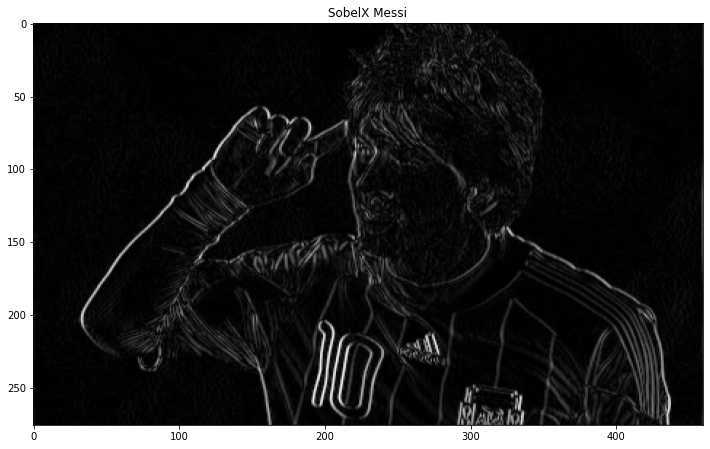

In [ ]:
mat_size = 3
sobelX_ker = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]])

sobelX_ker = sobelX_ker / (mat_size ** 2)

sobelX_img = np.abs(convolve2d(messi_img, sobelX_ker, 'same'))

print_image(sobelX_img, title='SobelX Messi')

## sobelY Matrix

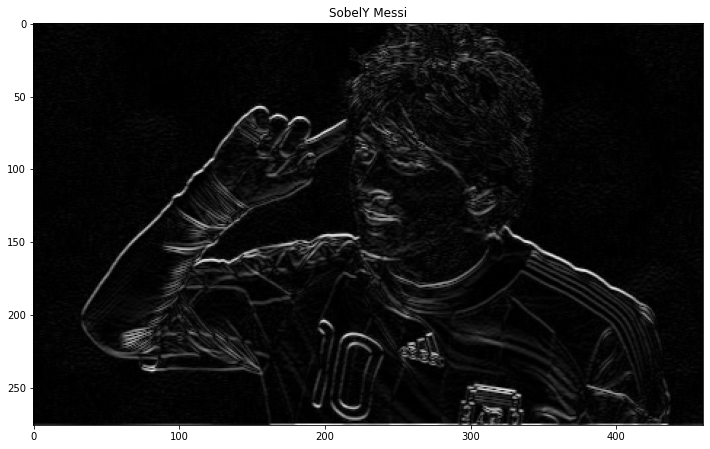

In [ ]:
mat_size = 3
sobelY_ker = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])

sobelY_ker = sobelY_ker / (mat_size ** 2)

sobelY_img = np.abs(convolve2d(messi_img, sobelY_ker, 'same'))

print_image(sobelY_img, title='SobelY Messi')

## All Together

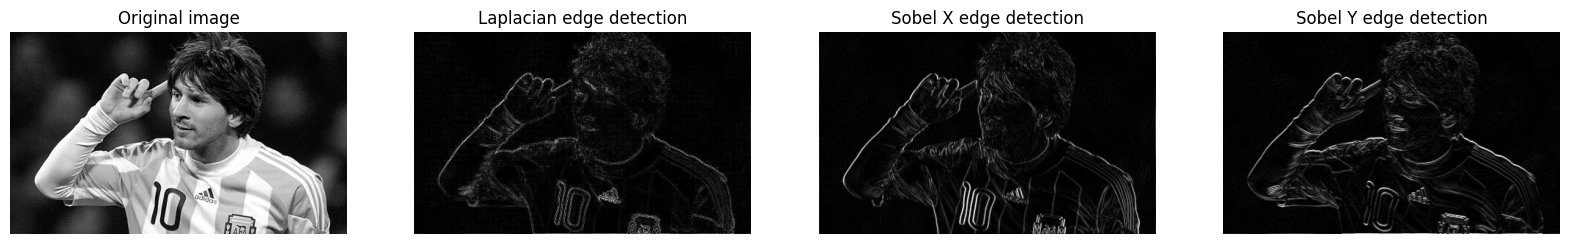

In [ ]:
plt.figure(figsize=(20, 20), dpi=100)
plt.subplot(1, 4, 1)
plt.imshow(messi_img, cmap="gray")
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 4, 2)
plt.imshow(laplacian_img, cmap="gray")
plt.axis("off")
plt.title("Laplacian edge detection")

plt.subplot(1, 4, 3)
plt.imshow(sobelX_img, cmap="gray")
plt.axis("off")
plt.title("Sobel X edge detection")

plt.subplot(1, 4, 4)
plt.imshow(sobelY_img, cmap="gray")
plt.axis("off")
plt.title("Sobel Y edge detection")

plt.show()

## Sharpen

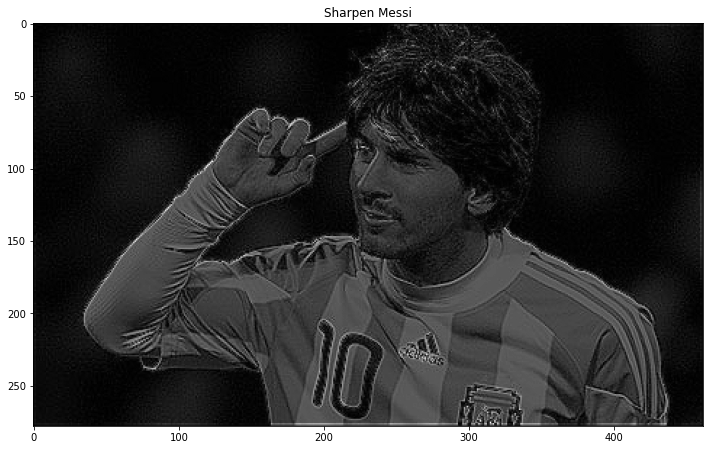

In [ ]:
mat_size = 3
sharp_ker = np.array([[0, -1, 0],
                      [-1, 5, -1],
                      [0, -1, 0]])

sharp_ker = sharp_ker / (mat_size ** 2)

sharp_img = np.abs(convolve2d(messi_img, sharp_ker))

print_image(sharp_img, title='Sharpen Messi')

# MSE


In [ ]:
def mse(r_img, gt_img):
    r_img = r_img.astype(np.float)
    gt_img = gt_img.astype(np.float)
    return np.sum(np.mean((r_img - gt_img) ** 2)) / r_img.size

In [ ]:
print(mse(sharp_img, sharp_img + 5))

0.0001946494752250148


# My 2D Convolution

In [ ]:
def myConv2d(image, kernel):

    #   extract image dimentions
    img_rows, img_cols = image.shape

    #   extract kernel dimentions
    ker_rows, ker_cols = kernel.shape

    #   calculate dimentions of image with padding
    rows_with_padd = img_rows + ker_rows - 1
    cols_with_padd = img_cols + ker_cols - 1
    
    #   array to store the image with the padding
    image_with_padd = np.zeros([rows_with_padd, cols_with_padd])

    #   calculate the bounds of the image inside the padded array
    row_img_start = (rows_with_padd - img_rows) // 2
    row_img_end = rows_with_padd - row_img_start
    col_img_start = (cols_with_padd - img_cols) // 2
    col_img_end = cols_with_padd - col_img_start

    #   place the image in padded array
    image_with_padd[row_img_start: row_img_end, col_img_start: col_img_end] = image

    #   flip the kernel
    kernel = np.flip(kernel, 0)
    kernel = np.flip(kernel, 0)

    #   output convolution array
    output = np.zeros([img_rows, img_cols])

    #   perform the convolution
    for x in range(img_rows):
        for y in range(img_cols):
            output[x, y] = np.sum(kernel * image_with_padd[x: x + ker_rows, y: y + ker_cols])

    return output



## Compare My Convolution VS. scipy's

In [ ]:
my_laplacian_img = np.abs(myConv2d(img, laplacian_ker))
my_sobelX_img = np.abs(myConv2d(img, sobelX_ker))
my_sobelY_img = np.abs(myConv2d(img, sobelY_ker))

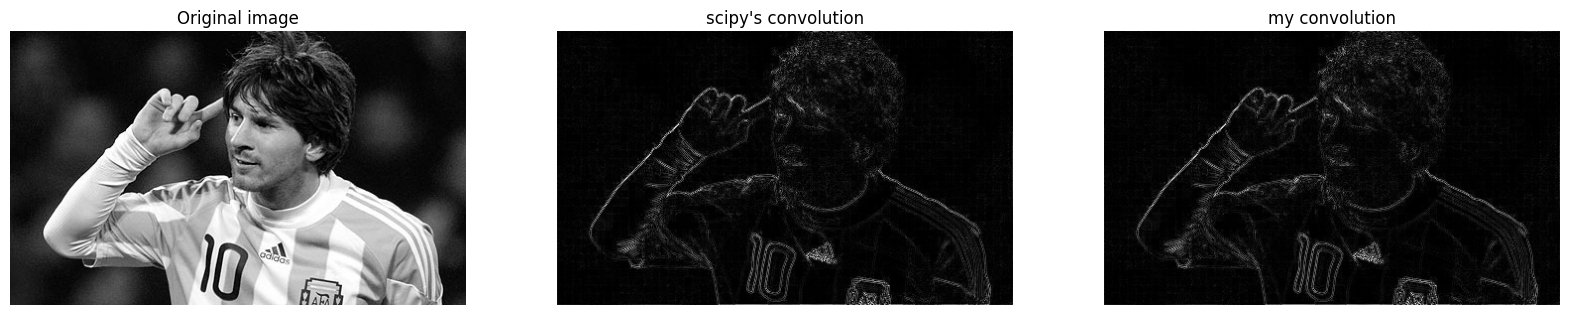

In [ ]:
plt.figure(figsize=(20, 20), dpi=100)
plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 3, 2)
plt.imshow(laplacian_img, cmap="gray")
plt.axis("off")
plt.title("scipy's convolution")

plt.subplot(1, 3, 3)
plt.imshow(my_laplacian_img, cmap="gray")
plt.axis("off")
plt.title("my convolution")

plt.show()

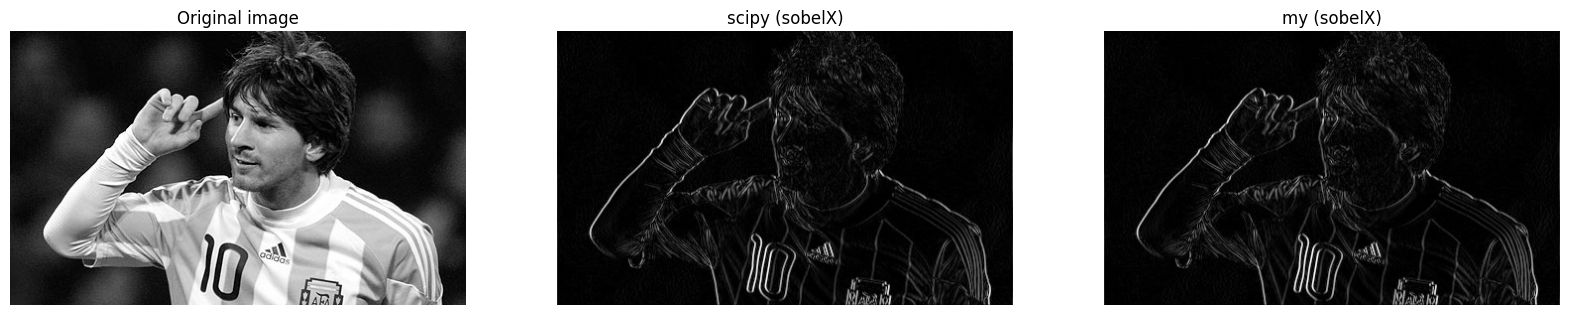

In [ ]:
plt.figure(figsize=(20, 20), dpi=100)
plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 3, 2)
plt.imshow(sobelX_img, cmap="gray")
plt.axis("off")
plt.title("scipy (sobelX)")

plt.subplot(1, 3, 3)
plt.imshow(my_sobelX_img, cmap="gray")
plt.axis("off")
plt.title("my (sobelX)")

plt.show()

Text(0.5, 1.0, 'my (sobelY)')

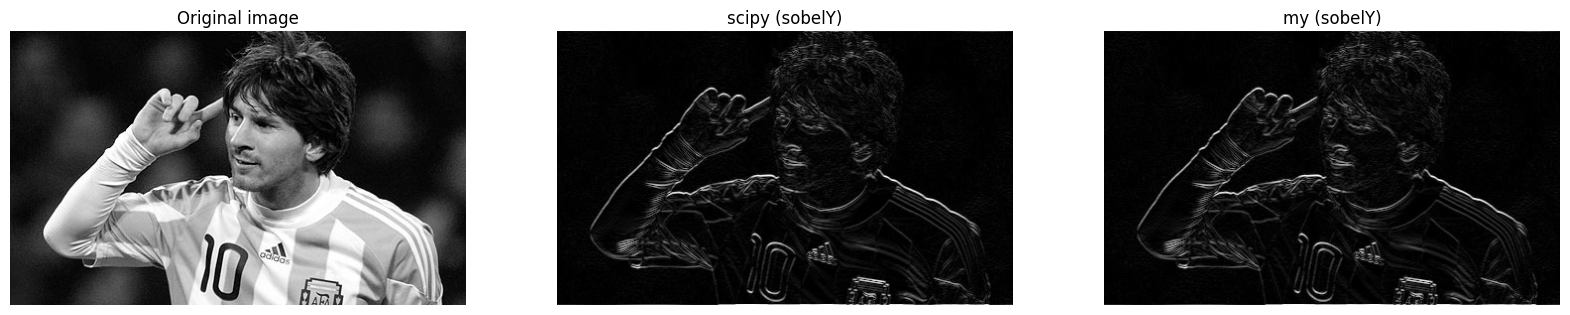

In [ ]:
plt.figure(figsize=(20, 20), dpi=100)
plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 3, 2)
plt.imshow(sobelY_img, cmap="gray")
plt.axis("off")
plt.title("scipy (sobelY)")

plt.subplot(1, 3, 3)
plt.imshow(my_sobelY_img, cmap="gray")
plt.axis("off")
plt.title("my (sobelY)")

### MSE myConv2d VS. scipy's

In [ ]:
print('Laplasian MSE my convolution VS. scipy\'s: {}'.format(mse(my_laplacian_img, laplacian_img)))
print('SobelX MSE my convolution VS. scipy\'s: {}'.format(mse(my_sobelX_img, sobelX_img)))
print('SobelY MSE my convolution VS. scipy\'s: {}'.format(mse(my_sobelY_img, sobelY_img)))

Laplasian MSE my convolution VS. scipy's: 8.132098829019178e-35
SobelX MSE my convolution VS. scipy's: 4.702406990014154e-35
SobelY MSE my convolution VS. scipy's: 2.246514912459775e-34


As we can see, very minor errors 🙌🏼

## Canny Edge

In [ ]:
zebra_img = cv2.imread(GOOGLE_DRIVE_PATH + '/' + 'zebra.jpg')
zebra_img = cv2.cvtColor(zebra_img, cv2.COLOR_BGR2GRAY)          #   convert to gray scale

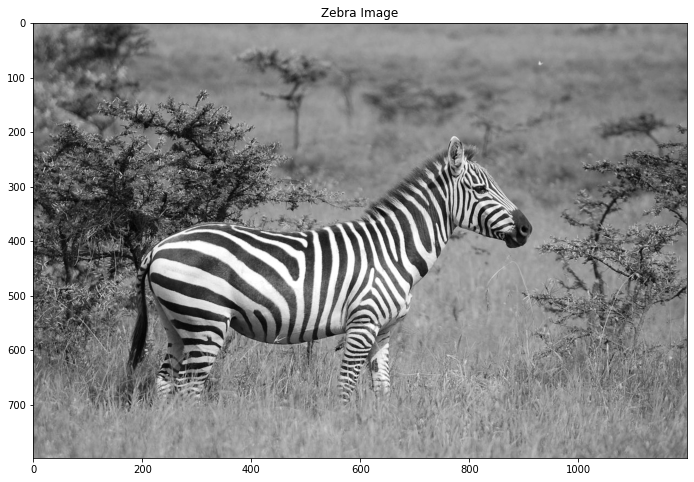

In [ ]:
print_image(zebra_img, 'Zebra Image')

In [ ]:
canny_edge_zebra1 = cv2.Canny(zebra_img, 50, 150)
canny_edge_zebra2 = cv2.Canny(zebra_img, 100, 150)
canny_edge_zebra3 = cv2.Canny(zebra_img, 100, 200)

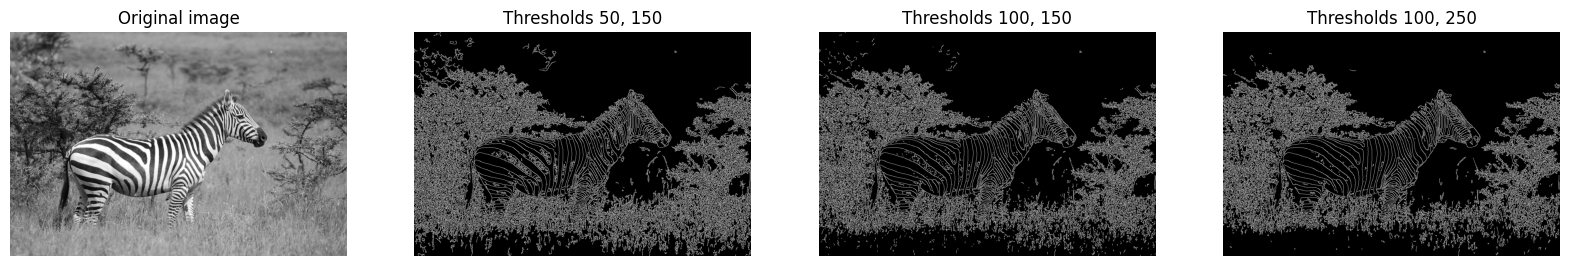

In [ ]:
fig = plt.figure(figsize=(20, 20), dpi=100)
plt.subplot(1, 4, 1)
plt.imshow(zebra_img, cmap="gray")
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 4, 2)
plt.imshow(canny_edge_zebra1, cmap="gray")
plt.axis("off")
plt.title("Thresholds 50, 150")

plt.subplot(1, 4, 3)
plt.imshow(canny_edge_zebra2, cmap="gray")
plt.axis("off")
plt.title("Thresholds 100, 150")

plt.subplot(1, 4, 4)
plt.imshow(canny_edge_zebra3, cmap="gray")
plt.axis("off")
plt.title("Thresholds 100, 250")

plt.show()

In [ ]:
canny_edge_messi1 = cv2.Canny(img, 50, 150)
canny_edge_messi2 = cv2.Canny(img, 100, 150)
canny_edge_messi3 = cv2.Canny(img, 100, 200)

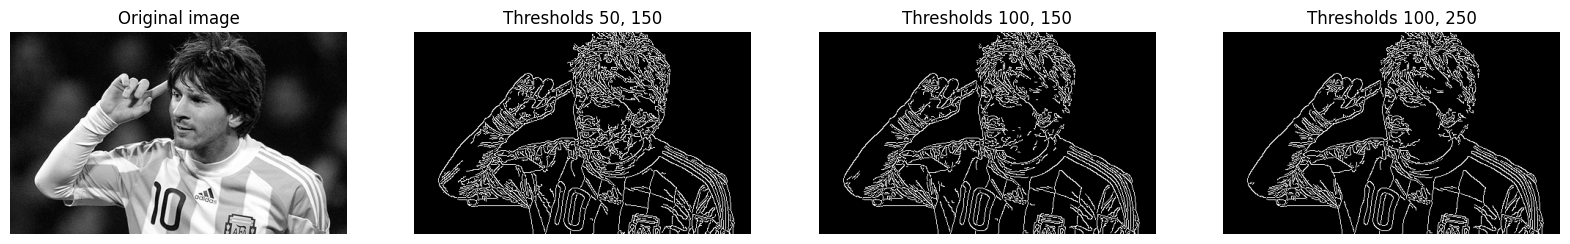

In [ ]:
fig = plt.figure(figsize=(20, 20), dpi=100)
plt.subplot(1, 4, 1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 4, 2)
plt.imshow(canny_edge_messi1, cmap="gray")
plt.axis("off")
plt.title("Thresholds 50, 150")

plt.subplot(1, 4, 3)
plt.imshow(canny_edge_messi2, cmap="gray")
plt.axis("off")
plt.title("Thresholds 100, 150")

plt.subplot(1, 4, 4)
plt.imshow(canny_edge_messi3, cmap="gray")
plt.axis("off")
plt.title("Thresholds 100, 250")

plt.show()